# E1A Linkers from González-Foutel et al. 2022

This experiment seeks to recreate the results from figure 4b in the 2022 paper by Gonzáles-Foutel et al. in Nature Structural & Molecular Biology [https://doi.org/10.1038/s41594-022-00811-w].

In [31]:
# Imports
from Bio import SeqIO
import json
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../../src')
import data_utils
import analyse_utils
import mdtraj as md

## Data preparation

In [107]:
# Creating metadata
data = {}
for record in SeqIO.parse("linker_sequences.fasta", "fasta"):
    data[record.id] = {
        "sequence": str(record.seq),
        "host": record.id.split("_")[1].split('dV')[0]
    }

metadata = {'templates': None, 'data': data}

In [9]:
# Saving sequences
os.makedirs('data', exist_ok=True)

# Iterating over rows
for id, d in data.items():
    seq = d['sequence']

    # Saving as FASTA format (Though one-line sequence)
    filepath = 'data/' + id + '.fasta'
    with open(filepath, 'w') as file:
        file.write('>' + id + ' ' + '\n')
        file.write(seq + '\n')

In [108]:
# Saving metadata
with open("e1a_linkers.json", 'w') as file:
    json.dump(metadata, file, indent=4)

## Analysis

In [2]:
# Loading metadata
metadata = analyse_utils.load_metadata('e1a_linkers.json', join=False)[0]
metadata

,sequence,host
CA_CAdV1_linker,ELENSRSPSPLLCDWCAEADSESTISTETDVGFTLNTPPVSPLPSY...,CA
HA_HAdV31_linker,DVESAGEDSNEQAVNDFFPESFILAAAEGVILPEPPVLSPICEPIG...,HA
HC_SAdV34_linker,DVVGPSDPNEQAVSSFFPESMLLASQEGVELETPPPIVDSPDPPQL...,SA
HE_SAdV22_linker,EVDVPENDPNEEAVNDLFSDAALLAAEQANTDSGSDSDSSLHTPRP...,SA
HG_HAdV52_linker,EVDPPQDPNEDAVNSMFPECLFEAAEEGSHSSEESKRGEEL,HA
SA_SAdV20_linker,DPGTETETDPLATAVDEFFPESMLLEADMPPHLESPVQPGAGGAMP...,SA
BA_BAdV1_linker,DDASDVVSLFFPELEVQQDLPTAEEVED,BA
CA_CAdV2_linker,ELETSHSPFVGLCDSCAEADTDSSASTEADSGFSPLSTPPVSPIPP...,CA
HB_HAdV11_linker,EVEGSEDSNEEAVNGFFTDSMLLAANEGLELDPPLDTFDTPGVIVE...,HA
HC_SAdV43_linker,DVLVDVNDPNEEAVSTFFPESALLAAQEGFDLHTPPLPILESPLPE...,SA


In [3]:
# Loading trajectories
metadata['traj'] = metadata.apply(lambda row: md.load_dcd(*['/'.join(['results', row.name, filename]) for filename  in ['traj.dcd', 'top.pdb']]), axis=1)

In [4]:
# Computing sequence lengths
metadata['length'] = metadata.apply(lambda row: len(row.sequence), axis=1)
metadata.sort_values('length', inplace=True)

In [5]:
# Setting custom order to match paper order
new_index = [
    'OA_BAdV2_linker',
    'BA_BAdV1_linker', # Switched up (28)
    'PC_PAdV5_linker', # Switched down (28)
    'HG_HAdV52_linker',
    'HF_HAdV40_linker', # Switched up (48)
    'SC_SAdV18_linker', # Switched down (48)
    'HF_HAdV41_linker',
    'BtA_BtAdV3_linker',
    'HD_HAdV10_linker', # Switched up (52)
    'SA_SAdV3_linker', # Switched down (52)
    'SA_SAdV20_linker',
    'HG_SAdV7_linker',
    'HD_HAdV19_linker',
    'CA_CAdV1_linker',
    'CA_CAdV2_linker', # Switched up (57)
    'BtB_BtAdV2_linker', # Switched down (57)
    'HA_HAdV31_linker',
    'SB_SAdV49_linker',
    'HE_SAdV25_linker',
    'HE_SAdV22_linker',
    'HC_SAdV43_linker',
    'HB_HAdV11_linker', # Switched up (62)
    'HB_SAdV27_linker', # Switched down (62)
    'HC_SAdV34_linker',
    'EA_EAdV1_linker',
    'HC_HAdV5_linker',
    'HA_HAdV18_linker'
    ]
metadata = metadata.loc[new_index]

In [6]:
# Computing Rg
metadata['Rg'] = metadata.apply(lambda row: analyse_utils.compute_rg(row.sequence, row.traj), axis=1)

In [7]:
# Computing Re
metadata['Re'] = metadata.apply(lambda row: analyse_utils.compute_end_to_end(row.traj), axis=1)

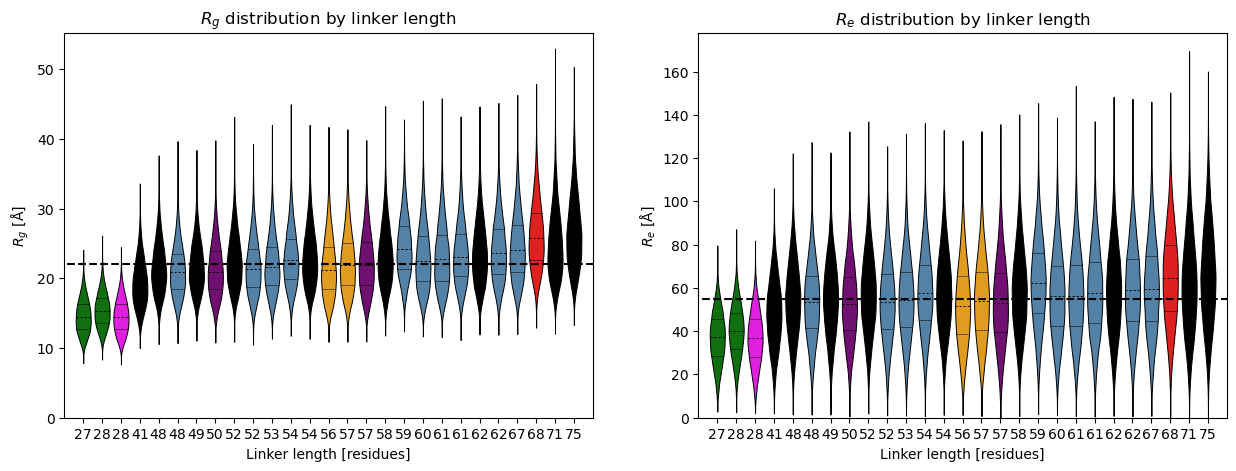

In [45]:
# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Setting host colours
host_colors = {
    "BA": "green",
    "CA": "orange",
    "PA": "magenta",
    "BtA": "purple",
    "EA": "red",
    "HA": "black",
    "SA": "steelblue"
}

# Plotting Rg distribution
ax = axes[0]
# Preparing data
data = metadata.explode('Rg').reset_index(names="id")
data.Rg = data.Rg.astype(float)
data.Rg = data.Rg*10 # Converted to Å from nm
# Plotting
sns.violinplot(x="id", y="Rg", data=data, ax=ax, inner='quartile', hue="host", dodge=False, palette=host_colors, linewidth=0.7)
ax.hlines(data.Rg.mean(), -2, len(metadata)+1, color='k', linestyles='--')
# Decorating
ax.get_legend().remove()
ax.set_title("$R_{g}$ distribution by linker length")
ax.set_xlabel("Linker length [residues]")
ax.set_ylabel("$R_{g}$ [Å]")
ax.set_xticklabels(metadata.length)
ax.set_xlim(-1, len(metadata))
ax.set_ylim(0)

# Plotting Re distribution
ax = axes[1]
# Preparing data
data = metadata.explode('Re').reset_index(names="id")
data.Re = data.Re.astype(float)
data.Re = data.Re*10 # Converted to Å from nm
# Plotting
sns.violinplot(x="id", y="Re", data=data, ax=ax, inner='quartile', hue="host", dodge=False, palette=host_colors, linewidth=0.7)
ax.hlines(data.Re.mean(), -2, len(metadata)+1, color='k', linestyles='--')
# Decorating
ax.get_legend().remove()
ax.set_title("$R_{e}$ distribution by linker length")
ax.set_xlabel("Linker length [residues]")
ax.set_ylabel("$R_{e}$ [Å]")
ax.set_xticklabels(metadata.length)
ax.set_xlim(-1, len(metadata))
ax.set_ylim(0)

# Show the plot
plt.show()


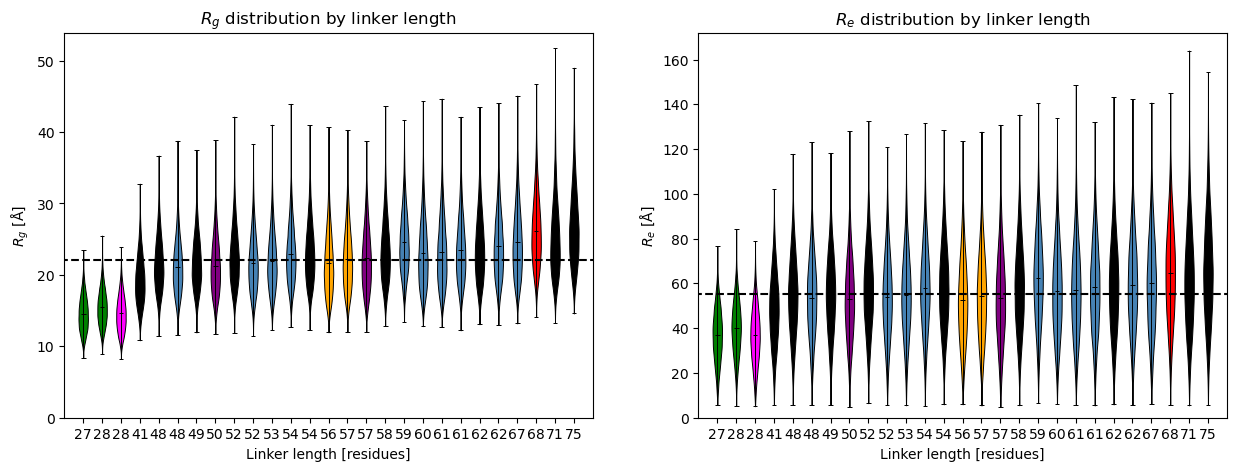

In [46]:
# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Setting host colours
host_colors = {
    "BA": "green",
    "CA": "orange",
    "PA": "magenta",
    "BtA": "purple",
    "EA": "red",
    "HA": "black",
    "SA": "steelblue"
}



# Plotting Rg distribution
ax = axes[0]
data = metadata.explode('Rg').reset_index(names="id")
data.Rg = data.Rg.astype(float)
data.Rg = data.Rg*10 # Converted to Å from nm

# Creating violin plots
violin_parts = ax.violinplot([data.Rg[data.id == i] for i in metadata.index], showmeans=True, showmedians=False)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_alpha(1)
    pc.set_facecolor(host_colors[metadata.iloc[i].host])
    pc.set_edgecolor('black')
    pc.set_linewidth(0.7)
for k in ['cmeans', 'cmaxes', 'cmins', 'cbars']:
    pc = violin_parts[k]
    pc.set_edgecolor('black')
    pc.set_linewidth(0.7)

# Decorating
ax.hlines(data.Rg.mean(), -2, len(metadata)+1, color='k', linestyles='--')
ax.set_title("$R_{g}$ distribution by linker length")
ax.set_xlabel("Linker length [residues]")
ax.set_ylabel("$R_{g}$ [Å]")
ax.set_xticks(range(1,len(metadata)+1))
ax.set_xticklabels(metadata.length)
ax.set_xlim(0, len(metadata)+1)
ax.set_ylim(0)



# Plotting Re distribution
ax = axes[1]
data = metadata.explode('Re').reset_index(names="id")
data.Re = data.Re.astype(float)
data.Re = data.Re*10 # Converted to Å from nm

# Creating violin plots
violin_parts = ax.violinplot([data.Re[data.id == i] for i in metadata.index], showmeans=True, showmedians=False)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_alpha(1)
    pc.set_facecolor(host_colors[metadata.iloc[i].host])
    pc.set_edgecolor('black')
    pc.set_linewidth(0.7)
for k in ['cmeans', 'cmaxes', 'cmins', 'cbars']:
    pc = violin_parts[k]
    pc.set_edgecolor('black')
    pc.set_linewidth(0.7)

# Decorating
ax.hlines(data.Re.mean(), -2, len(metadata)+1, color='k', linestyles='--')
ax.set_title("$R_{e}$ distribution by linker length")
ax.set_xlabel("Linker length [residues]")
ax.set_ylabel("$R_{e}$ [Å]")
ax.set_xticks(range(1,len(metadata)+1))
ax.set_xticklabels(metadata.length)
ax.set_xlim(0, len(metadata)+1)
ax.set_ylim(0)



# Show the plot
plt.show()

In [11]:
# Calculating means
metadata['<Rg>'] = metadata.apply(lambda row: row.Rg.mean(), axis=1)
metadata['<Re>'] = metadata.apply(lambda row: row.Re.mean(), axis=1)

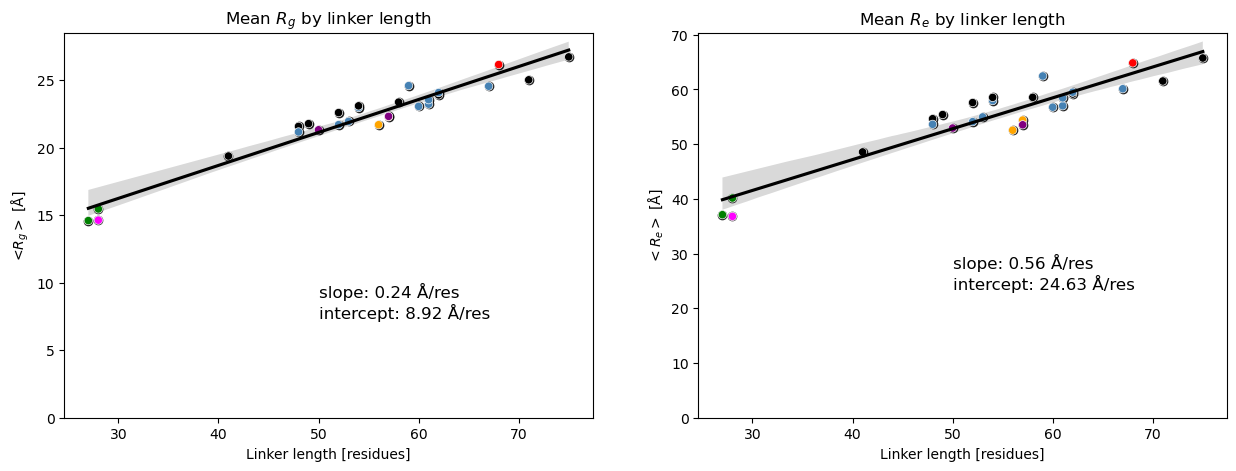

In [38]:
# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Setting host colours
host_colors = {
    "BA": "green",
    "CA": "orange",
    "PA": "magenta",
    "BtA": "purple",
    "EA": "red",
    "HA": "black",
    "SA": "steelblue"
}

# Plotting Rg correlation
ax = axes[0]
metadata['<Rg>'] = metadata.apply(lambda row: (row.Rg*10).mean(), axis=1)
# Plotting
sns.regplot(x="length", y="<Rg>", data=metadata, ax=ax, color='black')
sns.scatterplot(x="length", y="<Rg>", data=metadata, ax=ax, hue="host", palette=host_colors)
# Decorating
ax.get_legend().remove()
ax.set_title("Mean $R_{g}$ by linker length")
ax.set_xlabel("Linker length [residues]")
ax.set_ylabel("<$R_{g}>$ [Å]")
ax.set_ylim(0)
ax.text(50, 10, "slope: {:.2f} Å/res\nintercept: {:.2f} Å/res".format(*np.polyfit(metadata['length'], metadata['<Rg>'], 1)), fontsize=12, verticalalignment='top')

# Plotting Re correlation
ax = axes[1]
metadata['<Re>'] = metadata.apply(lambda row: (row.Re*10).mean(), axis=1)
# Plotting
sns.regplot(x="length", y="<Re>", data=metadata, ax=ax, color="black")
sns.scatterplot(x="length", y="<Re>", data=metadata, ax=ax, hue="host", palette=host_colors)
# Decorating
ax.get_legend().remove()
ax.set_title("Mean $R_{e}$ by linker length")
ax.set_xlabel("Linker length [residues]")
ax.set_ylabel("$<R_{e}>$ [Å]")
ax.set_ylim(0)
ax.text(50, 30, "slope: {:.2f} Å/res\nintercept: {:.2f} Å/res".format(*np.polyfit(metadata['length'], metadata['<Re>'], 1)), fontsize=12, verticalalignment='top')

plt.show()